This chapter discusses how the following training algorithms behave under the hood: 
- Linear Regression
- Polynomial Regression
- Logistic Regression
- Softmax Regression

# Linear Regression

*Equation 1: Linear Regression model prediction*

\begin{equation*}
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
\end{equation*}

$
\bullet \;\hat{y}\small{\text{ is the predicted value.}}\\
\bullet n\small{\text{ is the number of features.}}\\
\bullet x_i\small{\text{ is the }i^{th}\text{ feature value.}}\\
$

*Equation 2: Linear Regression model prediction (vectorized form)*

\begin{equation*}
\hat{y} = h_\boldsymbol{\theta}(\mathbf{x}) = \boldsymbol{\theta}\cdot\mathbf{x}
\end{equation*}

$
\bullet \;\boldsymbol{\theta}\small{
    \text{ is the model's parameter vector, containing the bias term }
    \theta_0
    \text{ and the feature weights }
    \theta_1
    \text{ to }
    \theta_n
}.\\
\bullet \;\mathbf{x}\small{
    \text{ is the instance's feature vector, containing }
    x_0
    \text{ to }
    x_n
    \text{, with }
    x_0
    \text{ always equal to 1}
}.\\
\bullet \;\boldsymbol{\theta}\cdot\mathbf{x}\small{
    \text{ is the dot product of the vectors }
    \boldsymbol{\theta}
    \text{ and }
    \mathbf{x}
    \text{, which is equal to }
    \theta_0 + \theta_1x_1 + \theta_2x_2\;+\;...\;+\;\theta_nx_n
}.\\
\bullet \;h_\boldsymbol{\theta}\small{
    \text{ is the hypothesis function, using the model parameters }
    \boldsymbol{\theta}
}.\\
$

*Equation 3: Mean Square Error (MSE) cost function for a Linear Regression model*

\begin{equation*}
\text{MSE}(\mathbf{X}, h_\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^m (\boldsymbol{\theta}^\mathsf{T}\mathbf{x}^{(i)}-y^{(i)})^2
\end{equation*}

Training Linear Regression models involves finding a parameter vector that minimizes the Root Mean Square Error (RMSE).

The Normal Equation is a closed-form solution to this problem.

*Equation 4: Normal Equation*

\begin{equation*}
\hat{\boldsymbol{\theta}} = (\mathbf{X}^{\mathsf{T}}\mathbf{X})^{-1}\mathbf{X}^{\mathsf{T}}\mathbf{y}
\end{equation*}

$
\bullet \;\hat{\boldsymbol{\theta}}\small{
    \text{ is the value of }
    \boldsymbol{\theta}
    \text{ that minimizes the cost function }
}.\\
\bullet \;\mathbf{y}\small{
    \text{ is the vector of target values containing }
    y^{(1)}
    \text{ to }
    y^{(m)}
}.\\
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

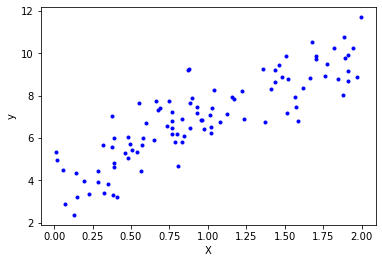

In [2]:
# Linear-ish random data to demonstrate the Normal Equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# Add x0 = 1 to each instance of X
X_b = np.c_[np.ones((100, 1)), X]

# Apply the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.949874  ],
       [3.09991634]])

A perfect solution would be $\theta_0 = 4$ and $\theta_1 = 3$, since the random data was generated using $y = 4 + 3x_1 +$ some Gaussian noise.

In [4]:
# Use the parameter vector to predict y values for x1 = 0 and x1 = 2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.949874  ],
       [10.14970668]])

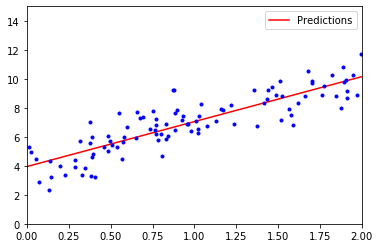

In [5]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [6]:
# Using Scikit-Learn's LinearRegression class
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.949874]), array([[3.09991634]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.949874  ],
       [10.14970668]])

In [8]:
# LinearRegression is based on scipy's least squares function scipy.linalg.lstsq()
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.949874  ],
       [3.09991634]])

scipy.linalg.lstsq() computes $\hat{\boldsymbol{\theta}} = \mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^+$ is the pseudoinverse of $\mathbf{X}$.

In [9]:
# Calculate using the pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[3.949874  ],
       [3.09991634]])

Using the pseudoinverse is both more efficient and more general than the Normal Equation.

## Gradient Descent

Gradient Descent is an algorithm that iteratively tweaks parameters in order to minimize a cost function (such as the MSE cost function in the case of Linear Regression). The amount the parameter changes is proportional to the slope so the steps get smaller as the parameters approach the minimum.

**Batch Gradient Descent** uses the entire training set to compute the gradients at each step.

*Equation 5: Partial derivatives of the MSE cost function*

\begin{equation*}
\frac{\partial}{\partial \theta_j}\text{MSE}(\boldsymbol{\theta}) = 
\frac{2}{m}\sum^m_{i=1}(\boldsymbol{\theta}^\mathsf{T}\mathbf{x}^{(i)}-y^{(i)})x^{(i)}_j
\end{equation*}

*Equation 6: Gradient vector of the cost function*

\begin{equation*}
\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})=
\begin{pmatrix}
\frac{\partial}{\partial\theta_0}\text{MSE}(\boldsymbol{\theta})\\
\frac{\partial}{\partial\theta_1}\text{MSE}(\boldsymbol{\theta})\\
\vdots\\
\frac{\partial}{\partial\theta_n}\text{MSE}(\boldsymbol{\theta})\\
\end{pmatrix}=
\frac{2}{m}\mathbf{X}^\mathsf{T}(\mathbf{X}\boldsymbol{\theta}-\mathbf{y})
\end{equation*}

*Equation 7: Gradient Descent step*

\begin{equation*}
\boldsymbol{\theta}^\text{(next step)}=\boldsymbol{\theta}-\eta\nabla_\boldsymbol{\theta}\text{MSE}(\boldsymbol{\theta})
\end{equation*}

$\eta$ represents the learning rate hyperparameter, which determines the size of each step.

In [10]:
# Hyperparameters
eta = 0.1
n_iterations = 1000
m = 100

# Some random initialization
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[3.949874  ],
       [3.09991634]])

This is the same result as from the Normal Equation. If $\eta$ was set to a smaller value, it would take much longer to converge; if it was larger, it would likely overshoot and diverge.

**Stochastic Gradient Descent** uses a random instance in the training set for each step to compute the gradients. This is faster and scales better than Batch Gradient Descent, but will take more iterations to determine less optimal final parameters.

The random nature of this algorithm makes it less likely to get caught in local optima, but since it can't converge like Batch Gradient descent the learning rate must be handled differently.

One example is a learning schedule, which reduces the learning rate over the number of iterations.

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

In [13]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[3.92845484],
       [3.09358742]])

In [15]:
from sklearn.linear_model import SGDRegressor

# This will continue for 1000 epochs or until the loss drops by less than 0.001 (tolerance)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96150945]), array([3.10953978]))

**Mini-batch Gradient Descent** provides a compromise between Stochastic and Batch Gradient Descent algorithms, in that it iterates over small batches of random instances for each step. It is both faster than Batch and less erratic than Stochastic.

In [17]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [18]:
theta

array([[3.99614705],
       [3.14629554]])

# Polynomial Regression

Polynomial regression involves using a linear model to fit nonlinear data by adding new features in the form of powers of existing features.

In [19]:
# Generate a sample of nonlinear data using the quadratic equation
np.random.seed(47)
m = 100
X = 3 * np.random.rand(m, 1)
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1) / 1.5

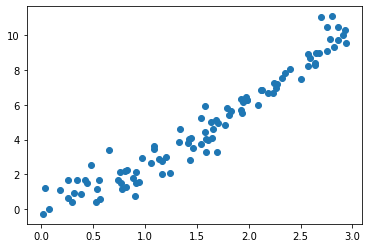

In [20]:
plt.scatter(X, y)
plt.show()

In [21]:
# PolynomialFeatures can generate powers of features through transformation
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Expected result
X[0], X[0] ** 2

(array([0.34046542]), array([0.1159167]))

In [22]:
# New feature set
X_poly[0]

array([0.34046542, 0.1159167 ])

In [23]:
# Train a linear regression model with the new feature set
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([0.44762828]), array([[1.3464956 , 0.71105187]]))

In [24]:
# Generate some test data and transform it
X_new = np.linspace(0, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

# Predict the output
y_new = lin_reg.predict(X_new_poly)

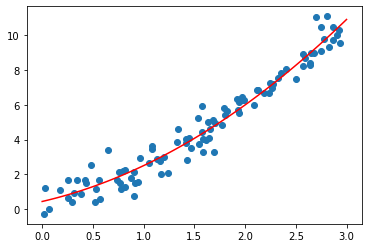

In [25]:
# Check the fit
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-')
plt.show()

# Learning Curves

Changing the degree for Polynomial Regression will impact the fit quality. A purely linear model (or first-degree polynomial) would underfit this data, whereas a 300-degree polynomial would overfit.

**Learning curves** are useful for visualizing a model's training performance to determine whether it is over- or underfitting the data.

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[m:])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[m:], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation')
    plt.legend()

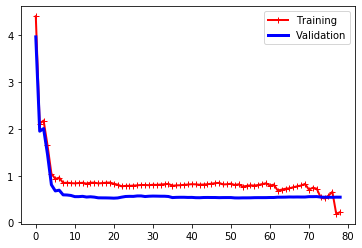

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

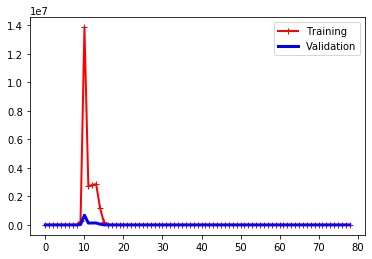

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

- **Bias error** is due to inaccurate assumptions about the data, such as attempting to fit a quadratic distribution with a purely linear model. High bias error often results in underfitting.

- **Variance error** is due to oversensitivity to small variations in the data, such as an overly high-degree polynomial model. High variance error often results in overfitting.

- **Irreducible error** is due to noise, and can typically only be reduced by cleaning up the data.

# Regularized Linear Models

One way to reduce overfitting is to regularize (or constrain) the model. Reducing the weights in linear models or the degrees in polynomial models are examples of regularization.

## Ridge Regression

**Ridge Regression** is a regularized version of linear regression with a regularization term added to the cost function equal to half the square of the $\ell_2$ norm of the weight vector.

*Equation 8: Ridge Regression cost function*

\begin{equation*}
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+\alpha\frac{1}{2}\sum^n_{i=1}\theta_i^2
\end{equation*}

- Regularized cost functions are typically only used during training
- Performance should be evaluated using the unregularized cost function ($\alpha=0$ for ridge regression)
- Most regularized models are sensitive to feature scale, so it is important to scale the data before fitting

*Equation 9: Ridge Regression closed-form solution*

\begin{equation*}
\hat{\boldsymbol{\theta}}=(\mathbf{X}^\mathsf{T}\mathbf{X}+\alpha\mathbf{A})^{-1}\mathbf{X}^\mathsf{T}\mathbf{y}
\end{equation*}

$$
    \mathbf{A}=\begin{pmatrix}
    0 & 0 & 0 & \cdots & 0 \\
    0 & 1 & 0 & \cdots & 0 \\
    0 & 0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & 1 \\
    \end{pmatrix}
$$

In [29]:
# Applying a variation of the closed-form solution (Cholesky matrix factorization) 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.55434619]])

In [30]:
# Stochastic gradient descent with regularization term l2 (same as Ridge)
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.62418964])

In [31]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 12]) 

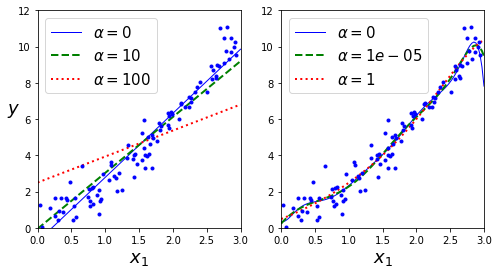

In [32]:
plt.figure(figsize=(8,4))

# Linear model with different alphas
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=47)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Polynomial model with different alphas
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=47)
plt.show()

## Lasso Regression

**Lasso Regression** (or *Least Absolute Shrinkage and Selection Operator* Regression) is similar to Ridge Regression but uses the $\ell_1$ norm of the weight vector.

*Equation 10: Lasso Regression cost function*

\begin{equation*}
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+\alpha\sum^n_{i=1}|\theta_i|
\end{equation*}

*Equation 11: Lasso Regression subgradient vector*

\begin{equation*}
g(\boldsymbol{\theta},J)=\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})+\alpha
    \begin{pmatrix}
    \text{sign}(\theta_1)\\
    \text{sign}(\theta_2)\\
    \vdots\\
    \text{sign}(\theta_n)
    \end{pmatrix}
\text{ where } \text{sign}(\theta_i)=
    \begin{cases}
    -1 & \text{ if }\theta_i<0\\
    0 & \text{ if }\theta_i=0\\
    +1 & \text{ if }\theta_i>0
    \end{cases}
\end{equation*}

In [33]:
# Applying the closed-form Lasso Regression 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.55882799])

In [34]:
# Stochastic gradient descent with regularization term l1 (same as Lasso)
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.63681952])

c:\users\codyt\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.120994745503793, tolerance: 0.09165305715392237
  positive)


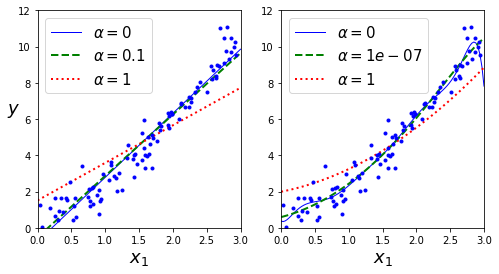

In [35]:
plt.figure(figsize=(8,4))

# Linear model with different alphas
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=47)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Polynomial model with different alphas
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=47)
plt.show()

## Elastic Net

**Elastic Net** is a combination of Ridge Regression and Lasso Regression whose regularization term $r$ is between $0$ and $1$.

\begin{equation*}
\text{Elastic Net}=
    \begin{cases}
    \text{Ridge Regression}& \text{ if }r=0\\
    \vdots\\
    \text{Lasso Regression}& \text{ if }r=1
    \end{cases}
\end{equation*}

*Equation 12: Elastic Net cost function*

\begin{equation*}
J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta})+r\alpha\sum^n_{i=1}|\theta_i|+\frac{1-r}{2}\alpha\sum^n_{i=1}\theta^2_i
\end{equation*}

- Ridge is useful when all features are important
- Lasso is better when only a few features are important
- Elastic is preferred over Lasso when there is high feature correlation or number of features, which can make Lasso more erratic

In [36]:
# Applying Elastic Net with r=0.5
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.56648424])

c:\users\codyt\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.131353037568225, tolerance: 0.09165305715392237
  positive)


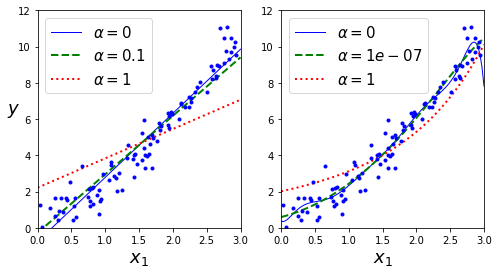

In [37]:
plt.figure(figsize=(8,4))

# Linear model with different alphas
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=47)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Polynomial model with different alphas
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), random_state=47)
plt.show()

## Early Stopping

**Early Stopping** is a regularization technique that stops training as soon as the validation error reaches a minimum. This can be achieved by keeping a record of the lowest error (along with the model and epoch responsible for it) throughout the training process, and reverting to it if the validation error is consistently higher over some number of subsequent epochs.

In [38]:
from sklearn.base import clone

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate='constant',
    eta0=0.0005    
)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [39]:
best_model.fit(X_train_poly_scaled, y_train)
best_predict = best_model.predict(X_val_poly_scaled)
mean_squared_error(y_val, best_predict)

5920.293921185337

In [40]:
mean_squared_error(y_val, y_val_predict)

2126.5399428238934

# Logistic Regression

**Logistic Regression** is commonly used for classification, which involves estimating the probability that an instance belongs to a class.

## Estimating Probabilities

Rather than outputting a specific result like Linear Regression, Logistic Regression uses the logistic function (a sigmoid) to output a probability between 0 and 1.

*Equation 13: Logistic Regression model estimated probability (vectorized form)*

\begin{equation*}
\hat{p}=h_\boldsymbol{\theta}(\mathbf{x})=\sigma(\mathbf{x}^\mathsf{T}\boldsymbol{\theta})
\end{equation*}

*Equation 14: Logistic function*

\begin{equation*}
\sigma(t)=\frac{1}{1+\text{exp}(-t)}
\end{equation*}

The inverse of the logistic function is called the logit function, which provides the logit $t$ for a given $p$.

*Equation 14b: Logit function*

\begin{equation*}
t(p)=log\Bigl(\frac{p}{1-p}\Bigr)
\end{equation*}

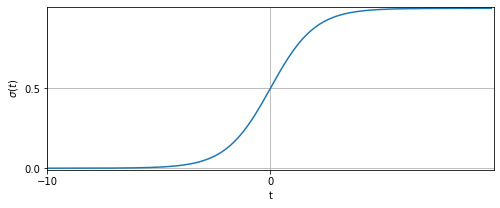

In [41]:
t = np.arange(-10, 10, 0.1)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot(t, sig)
plt.grid()
plt.xlabel('t')
plt.ylabel(r'$\sigma(t)$')
plt.xticks(np.arange(-10, 10, 10))
plt.yticks(np.arange(0, 1, 0.5))
plt.axis([-10, 10, -0.01, 1.01])
plt.show()

Logistic Regression predicts 1 if $\mathbf{x}^\mathsf{T}\boldsymbol{\theta}$ is positive and 0 if it is negative.

*Equation 15: Logistic Regression model prediction*

\begin{equation*}
\hat{y}=
    \begin{cases}
    0 & \text{ if } \hat{p}\lt0.5\\
    1 & \text{ if } \hat{p}\geq0.5\\
    \end{cases}
\end{equation*}

## Training and Cost Function

Training results in a parameter vector $\boldsymbol{\theta}$ that estimates high probabilities for positive instances and low probabilities for negative instances.

*Equation 16: Cost function of a single training instance*

\begin{equation*}
c(\boldsymbol{\theta})=
    \begin{cases}
    -log(\hat{p}) & \text{ if } y=1\\
    -\text{log}(1-\hat{p}) & \text{ if } y=0\\
    \end{cases}
\end{equation*}

The cost will be large if: 
- the model estimates a probability close to 0 for a positive instance
- the model estimates a probability close to 1 for a negative instance

The cost will be small if:
- the model estimates a probability close to 1 for a positive instance
- the model estimates a probability close to 0 for a negative instance

The complete cost function is the average cost over all training instances.

*Equation 17: Logistic Regression cost function (log loss)*

\begin{equation*}
J(\boldsymbol{\theta})=-\frac{1}{m}\sum^m_{i=1}\bigl[
    y^{(i)}log\bigl(
        \hat{p}^{(i)}
    \bigr)+\bigl(
        1-y^{(i)}
    \bigr)log\bigl(
        1-\hat{p}^{(i)}
    \bigr)
\bigr]
\end{equation*}

While there is no closed-form solution for the logistic regression cost function, it is a convex function, so a global minimum can be found using an optimization algorithm such as Gradient Descent.

*Equation 18: Logistic cost function partial derivative with respect to the $j^{\text{th}}$ model parameter $\theta_j$*

\begin{equation*}
\frac{\partial}{\partial{\theta_j}}J(\boldsymbol{\theta})=
\frac{1}{m}\sum^m_{i=1}\bigl(
    \sigma\bigl(
        \boldsymbol{\theta}^\mathsf{T}\mathbf{x}^{(i)}
    \bigr)-y^{(i)}
\bigr)x^{(i)}_j
\end{equation*}

## Decision Boundaries

The **Decision Boundary** is value at which Logistic Regression returns a classification probability of 0.5, indicating equal chance of both positive and negative classification. The Iris dataset will be used to demonstrate this.

In [46]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [52]:
print(f"Features: {iris['feature_names']}\nTargets: {iris['target_names']}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: ['setosa' 'versicolor' 'virginica']


In [53]:
# Just use petal width
X = iris['data'][:, 3:]

# 1 for Iris virginica, 0 otherwise
y = (iris['target'] == 2).astype(np.int)

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

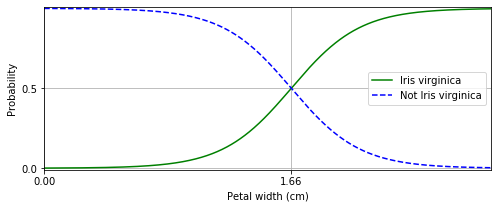

In [71]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris virginica')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 3, 1.66))
plt.yticks(np.arange(0, 1, 0.5))
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.axis([0, 3, -0.01, 1.01])
plt.show()

In this model, the decision boundary is at 1.66. If the petal width is higher, the model will predict the instance is an Iris virginica, otherwise it will not.

In [72]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

**Softmax Regression** is a Logistic Regression model generalized to support multiple classes directly by computing a score for each class and  applying the softmax function to the results to determine the probability of each class.

*Equation 19: Softmax score for class k*

\begin{equation*}
s_k(\mathbf{x})=\mathbf{x}^\mathsf{T}\boldsymbol{\theta}^{(k)}
\end{equation*}

*Equation 20: Softmax function*

\begin{equation*}
\hat{p}_k=\sigma(\mathbf{s}(\mathbf{x}))_k=\frac{
    \text{exp}\bigl(
        s_k(\mathbf{x})
    \bigr)
}{
    \sum^K_{j=1}\text{exp}\bigl(
        s_j(\mathbf{x})
    \bigr)
}
\end{equation*}

- $K$ is the number of classes
- $\mathbf{s}(\mathbf{x})$ is a vector containing the scores of each class for instance $\mathbf{x}$
- $\sigma(\mathbf{s}(\mathbf{x}))_k$ is the estimated probability that $\mathbf{x}$ belongs to $k$ given $\mathbf{s}(\mathbf{x})$

*Equation 21: Softmax Regression classifier prediction*

\begin{equation*}
\hat{y}
=\underset{k}{\text{argmax}}\sigma(\mathbf{s}(\mathbf{x}))_k
=\underset{k}{\text{argmax}}s_k(\mathbf{x})
=\underset{k}{\text{argmax}}\Bigl(
    \Bigl(
        \boldsymbol{\theta}^{(k)}
    \Bigr)^\mathsf{T}\mathbf{x}
\Bigr)
\end{equation*}

*Equation 22: Cross entropy cost function*

\begin{equation*}
J(\boldsymbol{\Theta})=-\frac{1}{m}\sum^m_{(i=1)}\sum^K_{(k=1)}y^{(i)}_k\text{log}\bigl(\hat{p}^{(i)}_k\bigr)
\end{equation*}

- $y^{(i)}_k$ is the target probability that the $i^{th}$ instance belongs to class $k$

Minimizing the cross entropy penalizes the model when it estimates a low probability for a target class.

*Equation 23: Cross entropy gradient vector for class k*

\begin{equation*}
\nabla_{\boldsymbol{\theta}^{(k)}}J(\boldsymbol{\Theta})
=\frac{1}{m}\sum^m_{i=1}\bigl(
    \hat{p}^{(i)}_k-y^{(i)}_k
\bigr)\mathbf{x}^{(i)}
\end{equation*}

This equation can be used to calculate the gradient vector for every class that can then be used along with an optimization algorithm (such as Gradient Descent) to determine a parameter matrix $\Theta$ that minimizes the cost function.

In [73]:
# Use both petal length and petal width
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
softmax_reg.predict([[5, 2]])

array([2])

In [87]:
dict(zip(iris['target_names'], softmax_reg.predict_proba([[5, 2]])[0]))

{'setosa': 6.380148956089212e-07,
 'versicolor': 0.057492999525600795,
 'virginica': 0.9425063624595037}